In [1]:
%matplotlib inline

In [2]:
import stats_enriched_tweets
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from mpltools import style
import numpy as np
from collections import Counter, OrderedDict
import pandas as pd
import plotly.plotly as py

filename = "/Users/muntean/refugees-output/Final2/refugees_all.json"

/Library/Python/2.7/site-packages/mpltools/style/__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)


# build indexes

In [3]:
# 1. tweet index
tweetIndex = stats_enriched_tweets.createTweetIndex(filename)
print len(tweetIndex)

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1238724


In [4]:
# 2. masks over tweet index
dailyTweetsDict = stats_enriched_tweets.createDailyTweetsMask(tweetIndex)
print "Daily tweets - volumes:", len(dailyTweetsDict)
userCountryTweetsDict = stats_enriched_tweets.createUserCountryTweetsMask(tweetIndex)
print "User country tweets - volumes - EU:", len(userCountryTweetsDict)

Daily tweets - volumes: 40
User country tweets - volumes - EU: 51


# plot types

In [212]:
def plotBarWithLables(distrib, labels, title, rot=0):
    style.use('ggplot')
    plt.figure()
    ind = np.arange(len(distrib))
    plt.bar(ind, distrib, width = 0.75, align='center', color='k', log=True)
    plt.xticks(ind, labels, rotation=rot, fontsize = 10)
    plt.title(title, fontsize = 10)
    plt.ylabel('Number of tweets', fontsize = 10)
#     plt.tight_layout()
    plt.xlim(xmin=-1)
    plt.ylim(ymax=12000)
    plt.savefig("/Users/muntean/refugees-output/plots/" + title.replace(" ","_") + ".pdf")
    plt.show()

In [202]:
def plotBarWithLablesNew(distrib, labels, title, rot=0):
    style.use('ggplot')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ind = np.arange(len(distrib))
    ax.bar(ind, distrib, width = 0.95, align='center', color='k')
    ax.annotate("UK & FR Calais security deal",
            xy=(7, 40000), xycoords='data',
            xytext=(5, 100000), textcoords='data',
            size=10, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2")
#             arrowprops=dict(arrowstyle="-|>",
#                                   connectionstyle="arc3,rad=-0.2",
#                                   fc="w")
            )
    ax.annotate("Death of Alan Kurdi & refugees cross AT-HU border",
            xy=(19, 60000), xycoords='data',
            xytext=(15, 120000), textcoords='data',
            size=10, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2")
#             arrowprops=dict(arrowstyle="-|>",
#                                   connectionstyle="arc3,rad=-0.2",
#                                   fc="w")
            )
    ax.annotate("Migrants break HU border facing arrests",
            xy=(28, 145000), xycoords='data',
            xytext=(20, 155000), textcoords='data',
            size=10, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2")
#             arrowprops=dict(arrowstyle="-|>",
#                                   connectionstyle="arc3,rad=-0.2",
#                                   fc="w")
            )
    
    
    plt.xticks(ind, labels, rotation=rot, fontsize = 10)
    plt.xlim(xmin=-1)
#     plt.legend(loc='upper left')
#     plt.title(title, fontsize = 10)
    plt.ylabel('Number of tweets', fontsize = 10)
    plt.tight_layout()
    plt.draw()
    plt.savefig("/Users/muntean/refugees-output/plots/" + title.replace(" ","_") + ".pdf")
    plt.show()

In [7]:
def plotStackedBar():
    import numpy as np
    import matplotlib.pyplot as plt


    N = 5
    menMeans = (20, 35, 30, 35, 27)
    womenMeans = (25, 32, 34, 20, 25)
    menStd = (2, 3, 4, 1, 2)
    womenStd = (3, 5, 2, 3, 3)
    ind = np.arange(N)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, menMeans, width, color='r', yerr=menStd)
    p2 = plt.bar(ind, womenMeans, width, color='y',
                 bottom=menMeans, yerr=womenStd)

    plt.ylabel('Scores')
    plt.title('Scores by group and gender')
    plt.xticks(ind + width/2., ('G1', 'G2', 'G3', 'G4', 'G5'))
    plt.yticks(np.arange(0, 81, 10))
    plt.legend((p1[0], p2[0]), ('Men', 'Women'))

    plt.show()

In [223]:
def plotBarWithLables2Distrib(a,b, labels, title, rot=0):

    #style.use('ggplot')
    ind = np.arange(len(a))  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, a, width, color='k')
    rects2 = ax.bar(ind + width, b, width, color='w', edgecolor='k')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Number of tweets')
#     ax.set_title(title)
    ax.set_xticks(ind + width)
    
    ax.set_xticklabels(labels)

    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

    ax.legend((rects1[0], rects2[0]), ('Negative', 'Positive'), loc='upper left')
    
#     def autolabel(rects):
#         # attach some text labels
#         for rect in rects:
#             height = rect.get_height()
#             ax.text(rect.get_x() + rect.get_width() / 2., 1.05 * height,
#                     '%d' % int(height),
#                     ha='center', va='bottom')
    
#     autolabel(rects1)
#     autolabel(rects2)

#     plt.tight_layout()
    plt.savefig("/Users/muntean/refugees-output/plots/"+ title.replace(" ","_") + ".pdf")
    plt.show()

# plots literally

#### tweets per day

In [196]:
def plotTweetsPerDay(tweetsPerDayDict):
    tweetsPerDay = [[len(y), x] for x, y in tweetsPerDayDict.items() if x is not None and len(y)>20000]
    #print tweetsPerDay
    tweetsPerDay.sort(key = lambda row: row[1])
    #print tweetsPerDay
    print "Tweets per day", len(tweetsPerDay)
    values = list(zip(*tweetsPerDay)[0])
    #print values
    labels = list(zip(*tweetsPerDay)[1])
    new_labels = [str(x)[4:6]+"-"+str(x)[6:] for x in labels]
    print new_labels
    #print labels
    plotBarWithLablesNew(values, new_labels, "Number of tweets per day and news", rot=90)

Tweets per day 30
['08-05', '08-06', '08-11', '08-12', '08-13', '08-15', '08-16', '08-19', '08-20', '08-21', '08-22', '08-23', '08-24', '08-25', '08-26', '08-28', '08-29', '08-30', '09-01', '09-04', '09-06', '09-09', '09-10', '09-11', '09-12', '09-13', '09-14', '09-15', '09-16', '09-17']


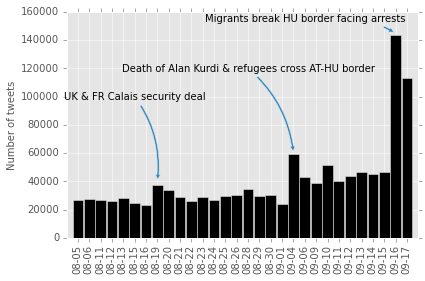

In [203]:
plotTweetsPerDay(dailyTweetsDict)

#### tweets per country

In [210]:
def plotTweetsPerCountry(tweetsPerCountryDict):
    """

    :param tweetsPerCountry: is a dictionary of key=country and values=list of tweets ids
    :return:
    """
    tweetsPerCountry = [[len(y), x] for x, y in tweetsPerCountryDict.items() if x is not None]
    tweetsPerCountry.sort(key = lambda row: row[0], reverse=True)
    values = list(zip(*tweetsPerCountry)[0])
#     cummulative_values = np.cumsum(values)
    labels = list(zip(*tweetsPerCountry)[1])
    plotBarWithLables(values[:20], labels[:20], "Number of tweets per country", rot=90)
#     plotBarWithLablesNew(cummulative_values[:20], labels[:20], "Cummulative number of tweets per country", rot=90)
#     print cummulative_values
#     print "GB", float(values[0])/cummulative_values[-1]
#     print "FR", float(values[1])/cummulative_values[-1]
#     print "DE", float(values[2])/cummulative_values[-1]

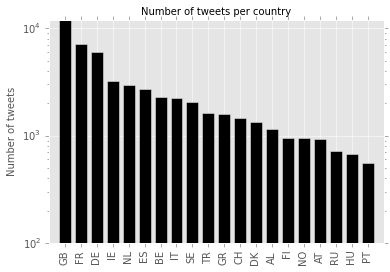

In [213]:
plotTweetsPerCountry(userCountryTweetsDict)

In [103]:
#### top 20 countries mentions
def top20countryMentions(dailyTweetsDict, tweetIndex):   
    # order chrono
    sortedDailyTweetsDict = sorted(x for x,k in dailyTweetsDict.iteritems() if len(k)>20000)
    # print len(sortedDailyTweetsDict)
    
    countryMentions = list()
    for day, tweetList in dailyTweetsDict.iteritems():
        if day in sortedDailyTweetsDict:
            for tweet_id in tweetList:
                mentions = tweetIndex[tweet_id]["text_location_mentions_c"]  #list
                for mention in mentions:
                    countryMentions.append(mention)
    #topCountryMentions = Counter(countryMentions).most_common(20)
    topCountryMentions = Counter(countryMentions).most_common()
    
    return topCountryMentions
         
top20CountryMentions = top20countryMentions(dailyTweetsDict, tweetIndex)
print len(top20CountryMentions)

154


In [108]:
#### top 20 countries mentions
def getCountryMentionsDict(dailyTweetsDict, tweetIndex):   
    # order chrono
    sortedDailyTweetsDict = sorted(x for x,k in dailyTweetsDict.iteritems() if len(k)>20000)
    # print len(sortedDailyTweetsDict)
    
    countryMentions = list()
    for day, tweetList in dailyTweetsDict.iteritems():
        if day in sortedDailyTweetsDict:
            for tweet_id in tweetList:
                mentions = tweetIndex[tweet_id]["text_location_mentions_c"]  #list
                for mention in mentions:
                    countryMentions.append(mention)
    #topCountryMentions = Counter(countryMentions).most_common(20)
    mentions_grouped = Counter(countryMentions).most_common()
    dictCountryMentions = { k:v for (k,v) in mentions_grouped }
    
    return dictCountryMentions
         
fullCountryMentions = getCountryMentionsDict(dailyTweetsDict, tweetIndex)
print len(fullCountryMentions)

154


In [118]:
def topcountryMentionsPerDayMODIFIED(dailyTweetsDict, tweetIndex):
    # order chrono
    sortedDailyTweetsDict = sorted(x for x,k in dailyTweetsDict.iteritems() if len(k)>20000)
    #print sortedDailyTweetsDict
    
    dailyMentions = dict() 
    for day, tweetList in dailyTweetsDict.iteritems():
        countryMentions = list()
        if day in sortedDailyTweetsDict:
            for tweet_id in tweetList:
                mentions = tweetIndex[tweet_id]["text_location_mentions_c"]  #list
                for mention in mentions:
                    countryMentions.append(mention)
            topMentions = Counter(countryMentions).most_common()
            dictCountryMentions = { k:v for (k,v) in topMentions }
            dailyMentions[day] = dictCountryMentions

            
    # orderd date keys chronologically
    sortedDailyMentions = OrderedDict(sorted(dailyMentions.items(), key=lambda t: t[0]))
    return sortedDailyMentions

dailyMentionDict = topcountryMentionsPerDayMODIFIED(dailyTweetsDict, tweetIndex)
print dailyMentionDict.keys()
print len(dailyMentionDict[20150812])
print len(dailyMentionDict[20150815])

[20150805, 20150806, 20150811, 20150812, 20150813, 20150815, 20150816, 20150819, 20150820, 20150821, 20150822, 20150823, 20150824, 20150825, 20150826, 20150828, 20150829, 20150830, 20150901, 20150904, 20150906, 20150909, 20150910, 20150911, 20150912, 20150913, 20150914, 20150915, 20150916, 20150917]
110
114


In [ ]:
dailyMentionDict[20150815]

In [ ]:
def top20countryMentionsPerDay(dailyTweetsDict, tweetIndex, top20CountryMentions):
    # order chrono
    sortedDailyTweetsDict = sorted(x for x,k in dailyTweetsDict.iteritems() if len(k)>20000)
    #print sortedDailyTweetsDict
    
    # getTopCountries
    topCountries = [x for [x,y] in top20CountryMentions]
    #print topCountries
    
    dailyMentions = dict() 
    for day, tweetList in dailyTweetsDict.iteritems():
        countryMentions = list()
        if day in sortedDailyTweetsDict:
            for tweet_id in tweetList:
                mentions = tweetIndex[tweet_id]["text_location_mentions_c"]  #list
                for mention in mentions:
                    if mention in topCountries:
                        countryMentions.append(mention)
            topMentions = Counter(countryMentions).most_common()
            #print topMentions
            orderedTopMentions = sorted(topMentions, key=lambda tup: tup[0])
            #print orderedTopMentions
            dailyMentions[day] = orderedTopMentions
            
    # orderd date keys chronologically
    sortedDailyMentions = OrderedDict(sorted(dailyMentions.items(), key=lambda t: t[0]))
    return sortedDailyMentions

dailyMentionDict = top20countryMentionsPerDay(dailyTweetsDict, tweetIndex, top20CountryMentions)
print dailyMentionDict.keys()
print dailyMentionDict[20150812]
print dailyMentionDict[20150815]

In [189]:
#### line plots
def plotLines(dailyMentionDict, countryMentions):  
    # http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
    # Now that the plot is prepared, it's time to actually plot the data!    
    # Note that I plotted the majors in order of the highest % in the final year.    
#     majors = ['Syria', 'Iran', 'United Kingdom', 'Iraq',    
#               'Germany', 'Hungary', 'Israel',    
#               'Ivory Coast', 'Russia', 'Nigeria',    
#               'Turkey', 'Yemen', 'India',    
#               'France', 'Greece', 'Libya',    
#               'Austria', 'Italy', 'China', 'Lebanon'] 
    majors = ["Croatia", "Hungary", "Austria", "Germany", "Serbia", "Macedonia", "Greece", "United Kingdom"]
    majors_alpha = sorted(majors) # 20 countries
    ind = range(len(majors_alpha)) # 0:19
    days = dailyMentionDict.keys() # 0:29

  
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)    

    # You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
    # exception because of the number of lines being plotted on it.    
    # Common sizes: (10, 7.5) and (12, 9)    
    country_lines = plt.figure()#figsize=(12, 14))    

    # Remove the plot frame lines. They are unnecessary chartjunk.    
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()    

#     Limit the range of the plot to only where the data is.    
#     Avoid unnecessary whitespace.    
    plt.ylim(10, 1000000)    
#     plt.xlim(-1, 35)    

    # Make sure your axis ticks are large enough to be easily read.    
    # You don't want your viewers squinting to read your plot.    
#     plt.yticks(range(0, 13000, 1000), [str(x) for x in range(0, 13000, 1000)], fontsize=10)  
    new_days = [str(x)[4:6]+"-"+str(x)[6:] for x in days]
    plt.xticks(range(30), new_days, fontsize=10, rotation=90)     
    
    ### devo iterare il dizionario in modo verticale
#     elim_countries = ["iran", "ivory coast"]
#     keep_countries = ["croatia", "hungary", "austria", "germany", "serbia", "macedonia", "greece"]
    keep_countries = ["syria", "nigeria", "ivory coast", "israel", "turkey", "lybia", "iraq", "iran"]
    for rank, country in enumerate(keep_countries):           
        countryValues = list()
        for day in days:
            countryValues.append(0 if country not in dailyMentionDict[day] else dailyMentionDict[day][country])
        
        #countryValues = [float(x)/N for x in countryValues]
#         if max(countryValues)<1000: continue
        data = np.array(countryValues)
#         data = (data - np.mean(data))
        if country == "syria":
            data[23] = 5500
        if country == "macedonia":
            data[3] = 1
        plt.semilogy(range(30), data,lw=2.5, color=tableau20[rank], label = " ".join([x.capitalize() for x in country.split()]))  
        
#     plt.legend(loc='upper left')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
          ncol=3, fancybox=True, shadow=True)
    plt.ylabel("Number of tweets")
    plt.savefig("/Users/muntean/refugees-output/plots/Top_migrant_crisis_ORIENT.pdf")
    plt.show()
    
    # Send updated figure object to Plotly, show result in notebook
    # https://plot.ly/python/line-and-scatter-plots-tutorial/
    # http://nbviewer.jupyter.org/github/plotly/python-user-guide/blob/master/s6_matplotlylib/s6_matplotlylib.ipynb
    # py.iplot(country_lines, filename='plotly-lines')

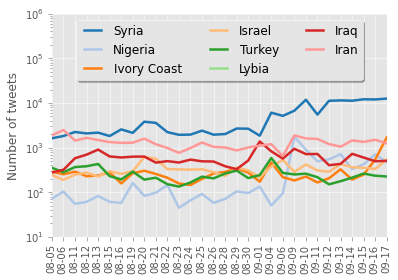

In [190]:
plotLines(dailyMentionDict, top20CountryMentions)

## mentions and sentiments

In [24]:
mentionSentiIndex = stats_enriched_tweets.buildCountrySentiIndexMention(filename)

30


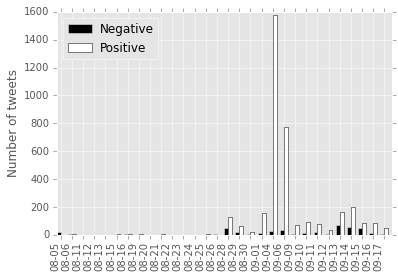

In [226]:
def plotCountrySentimentPerDay(dailySentiDict, countryName, days): #, generic_title):
    labels = list()
    against = list()
    pro = list()

    dailySentiDictSorted = sorted(dailySentiDict.iteritems(), key=lambda x: x[0])  # order by date
    for record in dailySentiDictSorted:
        day = record[0]
        if day in days:
            sentiList = record[1]
            labels.append(day)
            count_pro = sentiList.count(1)
            pro.append(count_pro)
            count_anti = sentiList.count(0)
            against.append(count_anti)
    new_labels = [str(x)[4:6]+"-"+str(x)[6:] for x in labels]
    plotBarWithLables2Distrib(against, pro, new_labels, countryName.capitalize() + "_sentiment_per_Day", rot=90)

days = dailyMentionDict.keys()   
print len(days)
# plotCountrySentimentPerDay(mentionSentiIndex["syria"], "syria", days)
# plotCountrySentimentPerDay(mentionSentiIndex["france"], "france", days)
# plotCountrySentimentPerDay(mentionSentiIndex["germany"], "germany", days)
plotCountrySentimentPerDay(mentionSentiIndex["austria"], "austria", days)
# plotCountrySentimentPerDay(mentionSentiIndex["united kingdom"], "united kingdom", days)
# plotCountrySentimentPerDay(mentionSentiIndex["nigeria"], "nigeria", days)
# #http://www.voanews.com/media/photogallery/europe-migrant-crisis-september-16-2015/2966005.html
# #08.09:http://www.theguardian.com/world/video/2015/sep/08/journalist-appears-to-kick-and-trip-fleeing-refugees-video
# plotCountrySentimentPerDay(mentionSentiIndex["hungary"], "hungary", days)
# plotCountrySentimentPerDay(mentionSentiIndex["greece"], "greece", days)
# plotCountrySentimentPerDay(mentionSentiIndex["serbia"], "serbia", days)
# plotCountrySentimentPerDay(mentionSentiIndex["macedonia"], "macedonia", days)
# plotCountrySentimentPerDay(mentionSentiIndex["croatia"], "croatia", days)
# plotCountrySentimentPerDay(mentionSentiIndex["turkey"], "turkey", days)

## location mentions and uniq user sentiment


In [21]:
mixedMentionUser = stats_enriched_tweets.buildMixCountryMentionUserSenti(filename)

finished step 1
finished step 2


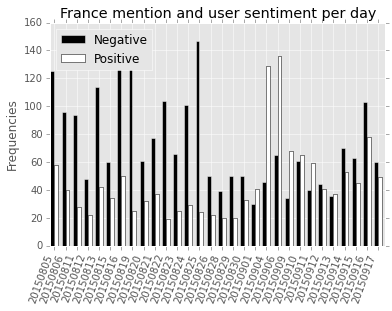

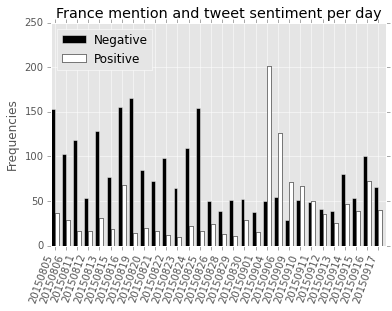

In [32]:
plotCountrySentimentPerDay(mixedMentionUser["france"], "france", days, " mention and user sentiment per day")
plotCountrySentimentPerDay(mentionSentiIndex["france"], "france", days, " mention and tweet sentiment per day")

In [25]:
print mixedMentionUser["germany"][20150917].count(0)
print mentionSentiIndex["germany"][20150917].count(0)

185
180


In [26]:
print mixedMentionUser["germany"][20150917].count(1)
print mentionSentiIndex["germany"][20150917].count(1)

158
185
